In [1]:
###IMPORTS#############################################
import os, sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.signal import find_peaks
from sklearn.metrics import mean_squared_error
from ahrs.filters import Complementary
from ahrs.common import quaternion as quat
from ahrs import DCM
#######################################################

In [2]:
#bot_state_dir = os.getcwd() + "\\mavic_state.csv"
#bot_state_dir = os.getcwd() + "\\mavic_state2.csv"
#bot_state_dir = os.getcwd() + "\\mavic_state5.csv"
#bot_state_dir = os.getcwd() + "\\mavic_state3.csv"
#bot_state_dir = os.getcwd() + "\\mavic_state4.csv"
#bot_state_dir = os.getcwd() + "\\mavic_state6.csv"
#bot_state_dir = os.getcwd() + "\\mavic_state6_wDefault.csv"
bot_state_dir = os.getcwd() + "\\mavic_state6_wTuned.csv"

print(bot_state_dir)
cols = ['x_pos', 'y_pos', 'z_pos', 
        'roll_rot', 'pitch_rot', 'yaw_rot',
        'x_vel', 'y_vel', 'alt_vel',
        'x_acc', 'y_acc', 'alt_acc',
        'roll_vel', 'pitch_vel', 'yaw_vel',
        'timestep',
#         'xpos_local', 'ypos_local', 'zpos_local',
#         'roll_ang', 'pitch_ang', 'yaw_ang',
        'tgt_waypt_err'
       ]



bot_stateDF = pd.read_csv(bot_state_dir, names=cols)
print(bot_stateDF.shape)
print(bot_stateDF)

C:\Users\ericx\OneDrive\Desktop\mine\grad_school\MARS_Lab_Swarm\Gazebo_dragonFly\webots_tutorial\hovering_test_project\python_utilities\mavic_state6_wTuned.csv
(4043, 17)
         x_pos         y_pos     z_pos  roll_rot  pitch_rot       yaw_rot  \
0    -0.005625 -5.900385e-08  0.115662  0.000002  -0.069871 -1.735217e-07   
1    -0.005625 -5.764667e-08  0.115662  0.000002  -0.069872 -1.718920e-07   
2    -0.005625 -5.743479e-08  0.115662  0.000002  -0.069872 -1.715229e-07   
3    -0.005625 -5.788793e-08  0.115662  0.000002  -0.069873 -1.719056e-07   
4    -0.005625 -5.869216e-08  0.115662  0.000002  -0.069873 -1.727044e-07   
...        ...           ...       ...       ...        ...           ...   
4038  0.024895 -1.658638e-01  1.202222 -0.000247   0.001895 -1.367417e-01   
4039  0.024920 -1.658625e-01  1.202259 -0.000247   0.001896 -1.367809e-01   
4040  0.024944 -1.658612e-01  1.202296 -0.000247   0.001896 -1.368200e-01   
4041  0.024969 -1.658599e-01  1.202333 -0.000247   0.001897

In [3]:
#PID_dir = os.getcwd() + "\\PID_and_inputs.csv"
#PID_dir = os.getcwd() + "\\PID_and_inputs2.csv"
#PID_dir = os.getcwd() + "\\PID_and_inputs5.csv"
#PID_dir = os.getcwd() + "\\PID_and_inputs3.csv"
#PID_dir = os.getcwd() + "\\PID_and_inputs4.csv"
#PID_dir = os.getcwd() + "\\PID_and_inputs6.csv"
#PID_dir = os.getcwd() + "\\PID_and_inputs6_wDefault.csv"
PID_dir = os.getcwd() + "\\PID_and_inputs6_wTuned.csv"

print(PID_dir)
cols = ['xposPD', 'yposPD',
        'rollPID', 'pitchPID', 'yawPID', 'throttlePID',
#         'rollDotPID', 'pitchDotPID', 'yawDotPID',
        'roll_input', 'pitch_input', 
        'yaw_input', 'vertical_input',
        'diff_altitude', 'clampd_diff_altitude',
       'front_left_motor', 'front_right_motor',
        'rear_left_motor', 'rear_right_motor']

PIDinputsDF = pd.read_csv(PID_dir, names=cols)
print(PIDinputsDF.shape)
print(PIDinputsDF)

C:\Users\ericx\OneDrive\Desktop\mine\grad_school\MARS_Lab_Swarm\Gazebo_dragonFly\webots_tutorial\hovering_test_project\python_utilities\PID_and_inputs6_wTuned.csv
(4043, 16)
        xposPD        yposPD       rollPID  pitchPID        yawPID  \
0    -0.002216  3.230221e-07 -3.334394e-07  0.034927  4.714854e-08   
1    -0.002217  3.065922e-07 -2.209708e-07  0.034935  1.003121e-08   
2    -0.002217  3.213843e-07 -3.209193e-07  0.034941  4.233740e-08   
3    -0.002217  3.213843e-07 -3.209193e-07  0.034941  4.233740e-08   
4    -0.002218  3.379885e-07 -4.348684e-07  0.034950  7.354665e-08   
...        ...           ...           ...       ...           ...   
4038  0.008872  7.525401e-02  4.601457e-05 -0.002153  4.416350e-02   
4039  0.008699  7.527569e-02  4.675365e-05 -0.002145  4.329208e-02   
4040  0.008699  7.527569e-02  4.675365e-05 -0.002145  4.329208e-02   
4041  0.008699  7.527569e-02  4.675365e-05 -0.002145  4.329208e-02   
4042  0.008831  7.528024e-02  4.656222e-05 -0.002150  4.

length of x_acc: 4043
length of timestep: 4043
x_acc-min: -0.1768434020917689
x_acc-max: 0.6852213624853114
[0.68522136 0.68443028 0.68488481 0.68490504 0.68491479 0.68491948
 0.68492124 0.68492135 0.6849205  0.68491909 0.68491734 0.68491536
 0.68491319 0.68491087 0.68490839 0.68490575 0.68490295 0.68489997
 0.68489682 0.68489348 0.68488995 0.68488622 0.68488229 0.68487816
 0.68487382 0.68486928 0.68486452 0.68485956 0.68485438 0.68484898
 0.68484337 0.68483755 0.68483151 0.68482525 0.68481878 0.68481209
 0.68480518 0.68479806 0.68479071 0.68478315 0.68477537 0.68476737
 0.68475915 0.68475072 0.68474206 0.68473319 0.6847241  0.68471478
 0.68470526 0.68469551]
[-0.00119108 -0.00145567 -0.00145018 -0.00149764 -0.00156607 -0.00160254
 -0.00163502 -0.00177556 -0.00172565 -0.00174142 -0.00175813 -0.00181644
 -0.0018335  -0.00185497 -0.00192629 -0.00195883 -0.00199648 -0.0018849
 -0.00193426 -0.00199133 -0.00235098 -0.0023734  -0.00252645 -0.00232419
 -0.00233724 -0.00234986 -0.00241473 -0.0

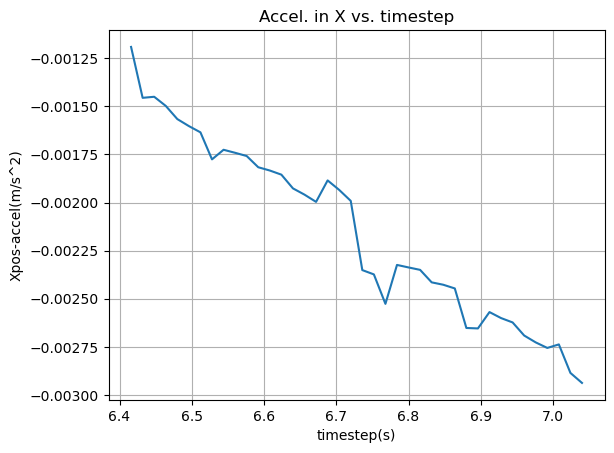

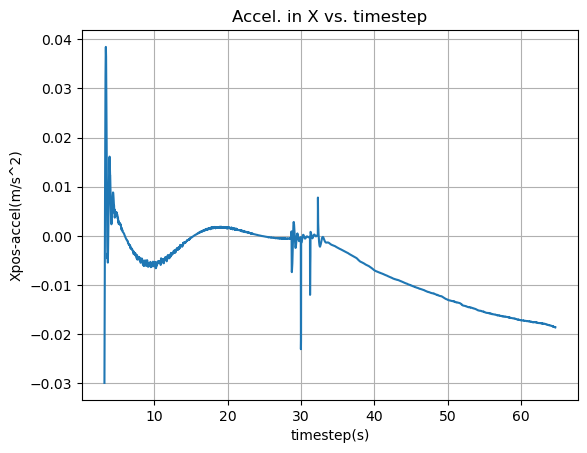

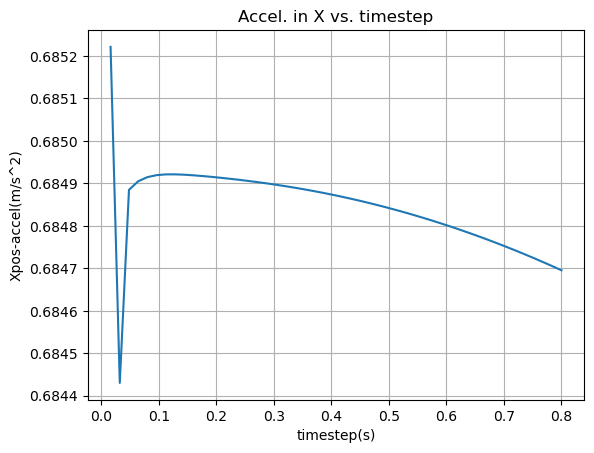

In [4]:
##Analyze integrating trans-acceleration into trans-velocity and into global velocity frme
###Plot x-acc vs timestep
x_acc = np.array(bot_stateDF["x_acc"])
timestep = np.array(bot_stateDF["timestep"])
print("length of x_acc: {}".format(len(x_acc)))
print("length of timestep: {}".format(len(timestep)))
print("x_acc-min: {}".format(x_acc.min()))
print("x_acc-max: {}".format(x_acc.max()))
print(x_acc[:50])
print(x_acc[400:440])
print(timestep[400:440])
print("x_acc at index: {}".format(x_acc[120]))
print("avg at samp: {:.4f}".format(np.mean(x_acc[2805:2845])))

peakvals = []
for i, acc_val in enumerate(x_acc):
    if acc_val > 1 or acc_val < -1:
        peakvals.append((timestep[i], acc_val))
for peak in peakvals:
    print(peak)

plt.plot(timestep[400:440], x_acc[400:440])
#plt.plot(timestep[300:], x_acc[300:])
plt.title("Accel. in X vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Xpos-accel(m/s^2)")
plt.grid()
plt.show()

plt.plot(timestep[200:], x_acc[200:])
plt.title("Accel. in X vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Xpos-accel(m/s^2)")
plt.grid()
plt.show()

plt.plot(timestep[:50], x_acc[:50])
plt.title("Accel. in X vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Xpos-accel(m/s^2)")
plt.grid()
plt.show()

length of x-vel: 4043
length of timestep: 4043
[0.00152284 0.0015236  0.00152437 0.00152505 0.00152577 0.00152658
 0.00152746 0.00152834 0.00152876 0.00152924 0.00152987 0.00153053
 0.00153117 0.00153171 0.00153252 0.00153339 0.00153358 0.00153421
 0.00153484 0.00153545]
0.0008465760582998151


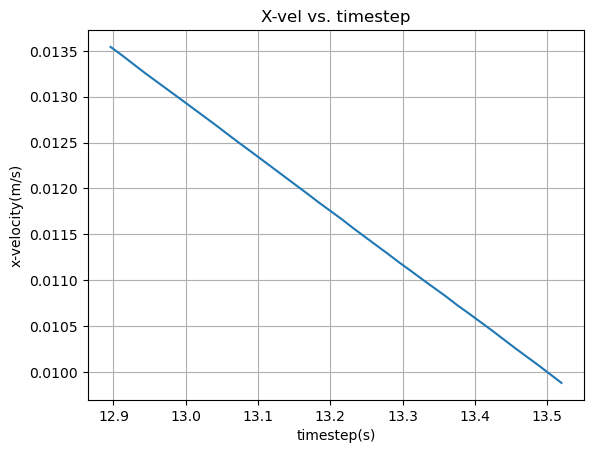

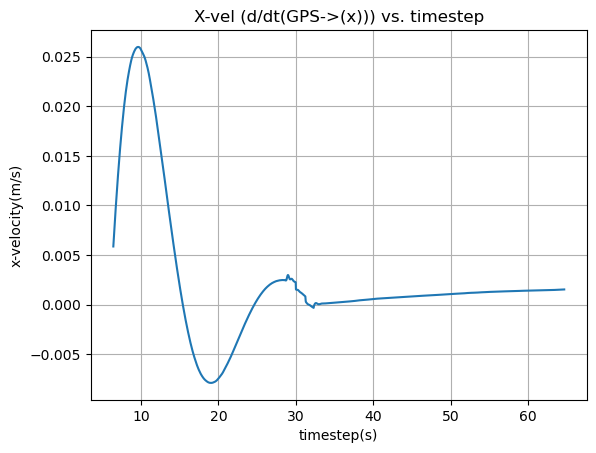

In [5]:
###Plot x-vel from (Xgps(t-1)-Xgps(t))/calcd_timestep vs timestep
x_vel = np.array(bot_stateDF["x_vel"])
timestep = np.array(bot_stateDF["timestep"])
print("length of x-vel: {}".format(len(x_vel)))
print("length of timestep: {}".format(len(timestep)))
print(x_vel[len(x_vel) - 20:])
print(np.mean(x_vel[2805:2845]))


plt.plot(timestep[805:845], x_vel[805:845])
plt.title("X-vel vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("x-velocity(m/s)")
plt.grid()
plt.show()

plt.plot(timestep[400:], x_vel[400:])
plt.title("X-vel (d/dt(GPS->(x))) vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("x-velocity(m/s)")
plt.grid()
plt.show()

length of x-pos: 4043
length of timestep: 4043
[0.02489509 0.02491972 0.02494435 0.024969   0.02499365]


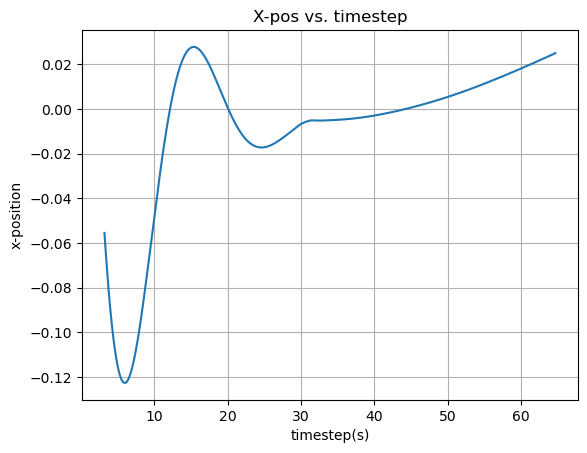

In [6]:
###Plot x-pos vs timestep
x_pos = np.array(bot_stateDF["x_pos"])
timestep = np.array(bot_stateDF["timestep"])
print("length of x-pos: {}".format(len(x_pos)))
print("length of timestep: {}".format(len(timestep)))
print(x_pos[len(x_pos) - 5:])

plt.plot(timestep[200:], x_pos[200:])
plt.title("X-pos vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("x-position")
plt.grid()
plt.show()

length of y_acc: 4043
length of timestep: 4043
y_acc-min: -0.0784655893338217
[-0.00243181 -0.00233974 -0.00244366 -0.00244149 -0.0024389 ]


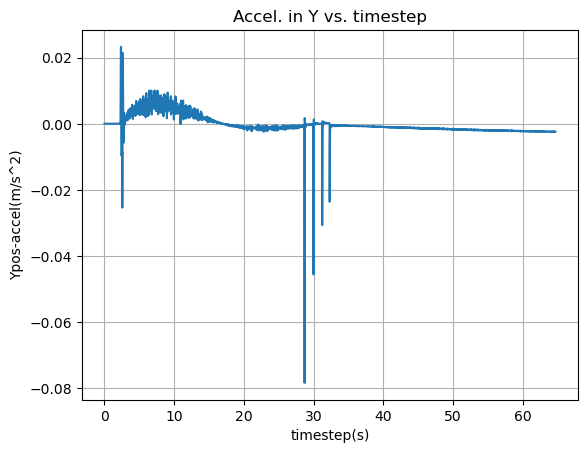

In [7]:
###Plot y-acc vs timestep
y_acc = np.array(bot_stateDF["y_acc"])
timestep = np.array(bot_stateDF["timestep"])
print("length of y_acc: {}".format(len(y_acc)))
print("length of timestep: {}".format(len(timestep)))
print("y_acc-min: {}".format(y_acc.min()))
print(y_acc[len(y_acc) - 5:])

plt.plot(timestep, y_acc)
plt.title("Accel. in Y vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Ypos-accel(m/s^2)")
plt.grid()
plt.show()

length of y-vel: 4043
length of timestep: 4043
[8.18753378e-05 8.14128022e-05 8.10201819e-05 8.08725117e-05
 8.06887192e-05 8.03810979e-05 8.01489805e-05 7.99607628e-05
 8.07995715e-05 8.10922800e-05 8.07301529e-05 8.04053557e-05
 8.01220583e-05 8.01000049e-05 7.96530614e-05 7.93577516e-05
 8.06791414e-05 8.02918206e-05 7.99574829e-05 7.96733113e-05]


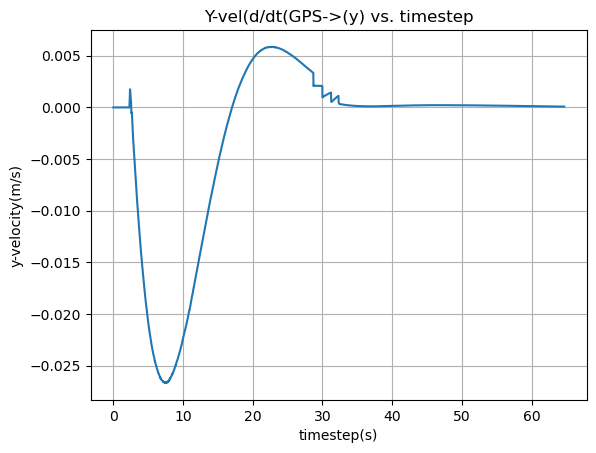

In [8]:
###Plot y-vel vs timestep
y_vel = np.array(bot_stateDF["y_vel"])
timestep = np.array(bot_stateDF["timestep"])
print("length of y-vel: {}".format(len(y_vel)))
print("length of timestep: {}".format(len(timestep)))
print(y_vel[len(y_vel) - 20:])

plt.plot(timestep, y_vel)
plt.title("Y-vel(d/dt(GPS->(y) vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("y-velocity(m/s)")
plt.grid()
plt.show()

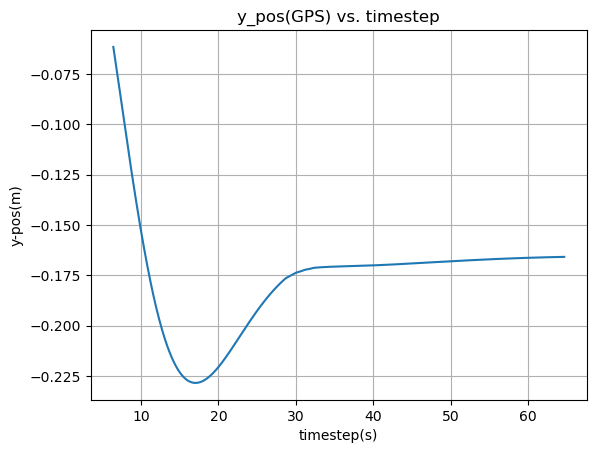

In [9]:
y_pos = np.array(bot_stateDF["y_pos"])
plt.plot(timestep[400:], y_pos[400:])
plt.title("y_pos(GPS) vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("y-pos(m)")
plt.grid()
plt.show()

length of alt_acc: 4043
length of timestep: 4043
alt_acc-min: 9.69209368417578
[9.81006534 9.81002361 9.81004244 9.81002918 9.81002235]


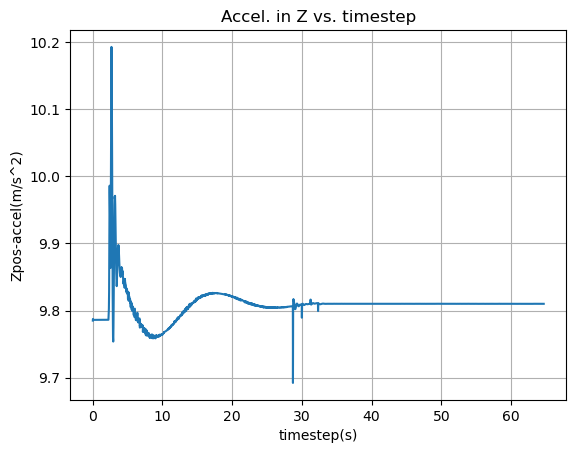

In [10]:
###Plot alt-acc vs timestep
alt_acc = np.array(bot_stateDF["alt_acc"])
timestep = np.array(bot_stateDF["timestep"])
print("length of alt_acc: {}".format(len(alt_acc)))
print("length of timestep: {}".format(len(timestep)))
print("alt_acc-min: {}".format(alt_acc.min()))
print(alt_acc[len(alt_acc) - 5:])

plt.plot(timestep, alt_acc)
plt.title("Accel. in Z vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Zpos-accel(m/s^2)")
plt.grid()
plt.show()

length of alt-vel: 4043
length of timestep: 4043
zvel-min: -0.0548549558484284
[0.0022813  0.00228232 0.0022831  0.00228428 0.00228511 0.00228681
 0.00228806 0.0022891  0.00229009 0.0022906  0.00229169 0.00229245
 0.00229305 0.00229441 0.00229614 0.00229747 0.00229813 0.0022991
 0.00229985 0.00230049]
0.00061667773014507


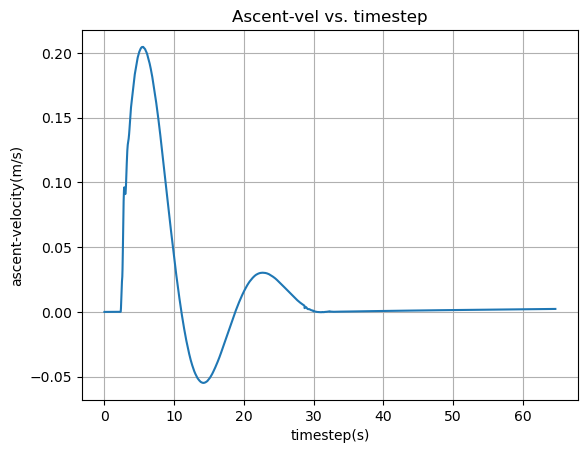

In [11]:
###Plot z-vel vs timestep
z_vel = np.array(bot_stateDF["alt_vel"])
timestep = np.array(bot_stateDF["timestep"])
print("length of alt-vel: {}".format(len(z_vel)))
print("length of timestep: {}".format(len(timestep)))
print("zvel-min: {}".format(z_vel.min()))
print(z_vel[len(z_vel) - 20:])
print(np.mean(z_vel[2400:2420]))

plt.plot(timestep, z_vel)
plt.title("Ascent-vel vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("ascent-velocity(m/s)")
plt.grid()
plt.show()

length of zpos: 4043
length of timestep: 4043
zpos-min: 0.1156619968273929
[1.20222184 1.20225874 1.20229566 1.20233259 1.20236953]
[0.115662   0.11566206 0.11566213 0.1156622  0.11566226 0.11566232
 0.11566237 0.11566243 0.11566248 0.11566254 0.1156626  0.11566266
 0.11566273 0.11566281 0.11566289 0.11566298 0.11566308 0.11566319
 0.11566331 0.11566343 0.11566357 0.11566371 0.11566386 0.11566402
 0.11566419 0.11566437 0.11566456 0.11566475 0.11566496 0.11566517
 0.11566539 0.11566563 0.11566587 0.11566611 0.11566637 0.11566664
 0.11566692 0.1156672  0.11566749 0.1156678  0.11566811 0.11566843
 0.11566876 0.11566909 0.11566944 0.11566979 0.11567016 0.11567053
 0.11567091 0.1156713 ]


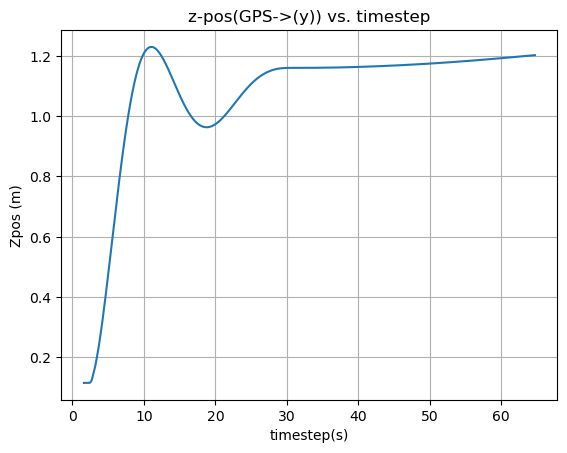

In [12]:
###Plot alt-acc vs timestep
zpos = np.array(bot_stateDF["z_pos"])
timestep = np.array(bot_stateDF["timestep"])
print("length of zpos: {}".format(len(zpos)))
print("length of timestep: {}".format(len(timestep)))
print("zpos-min: {}".format(zpos.min()))
print(zpos[len(zpos) - 5:])
print(zpos[:50])


plt.plot(timestep[100:], zpos[100:])
plt.title("z-pos(GPS->(y)) vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Zpos (m)")
plt.grid()
plt.show()

length of roll vel: 4043
length of timestep: 4043
[ 8.05172127e-07  7.61308088e-07  7.24593015e-07 ... -7.31324014e-06
 -2.67288403e-06  2.47251990e-06]
-0.00010997768578003829
[ 6.79827509e-04  3.70619230e-04 -6.85280346e-04 -1.24872245e-03
 -7.23408757e-04 -1.69926345e-04  2.54438522e-04  4.45911062e-04
  4.69274491e-04  3.70628754e-04 -1.81504445e-04 -5.19389879e-04
 -8.28645848e-05  8.15228989e-06  6.91023538e-05  4.04237901e-05
  1.06889216e-05 -1.24902114e-05 -4.20629639e-04  6.68224173e-05
  3.87887240e-04 -4.80334495e-04 -3.42558903e-04 -1.63516685e-04
  3.15082697e-07 -2.85566867e-04  2.39663811e-04  2.27981221e-04
  4.50292137e-04  4.94069899e-04 -5.43465167e-04 -1.37760332e-04
 -2.45995797e-04 -2.60835212e-04 -8.64964438e-04 -1.07176835e-03
 -3.98729848e-04  1.64244092e-04 -7.99911338e-05 -2.29746376e-04]


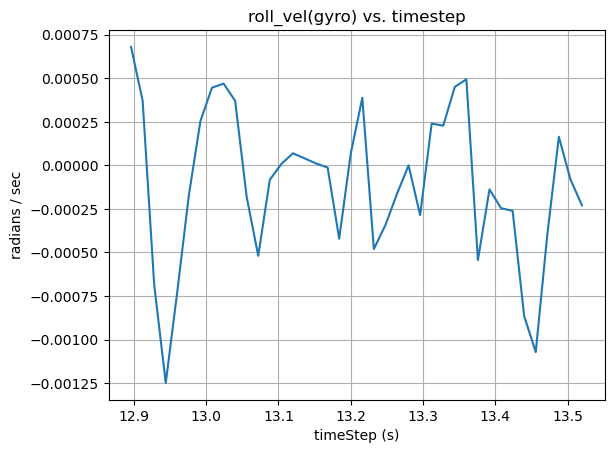

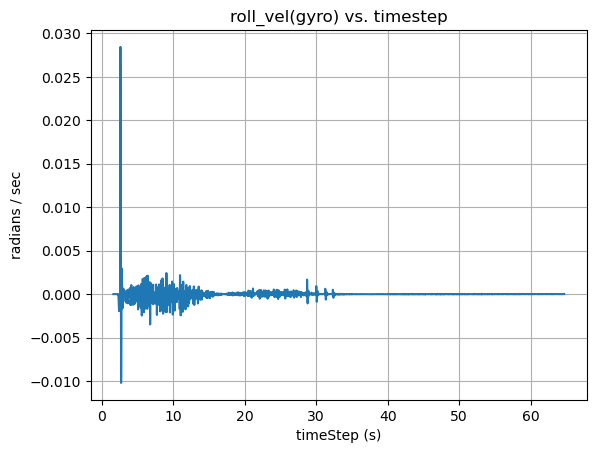

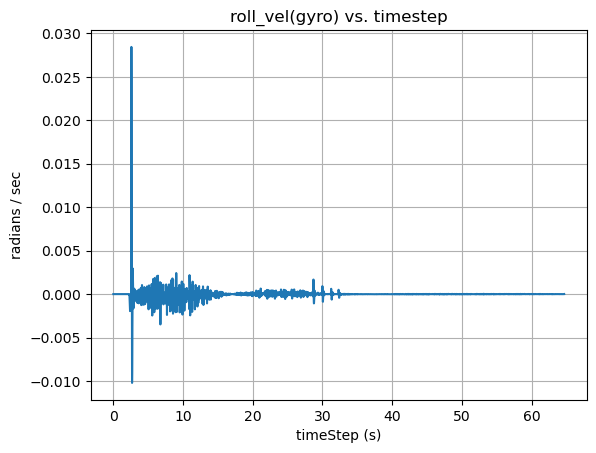

In [13]:
#plot roll velocity from gyro vs. timestep
roll_vel = np.array(bot_stateDF["roll_vel"])
timestep = np.array(bot_stateDF["timestep"])
print("length of roll vel: {}".format(len(roll_vel)))
print("length of timestep: {}".format(len(timestep)))
print(roll_vel[10:])

peakvals = []
for i, deg in enumerate(roll_vel):
    if deg > 1 or deg < -1:
        peakvals.append((timestep[i], deg))
for peak in peakvals:
    print(peak)



print(np.mean(roll_vel[805:845]))
print(roll_vel[805:845])

plt.plot(timestep[805:845], roll_vel[805:845])
plt.title("roll_vel(gyro) vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("radians / sec")
plt.grid()
plt.show()



plt.plot(timestep[100:], roll_vel[100:])
#lt.plot(timestep, roll_vel)
plt.title("roll_vel(gyro) vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("radians / sec")
plt.grid()
plt.show()

#plt.plot(timestep[200:], roll_vel[200:])
plt.plot(timestep, roll_vel)
plt.title("roll_vel(gyro) vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("radians / sec")
plt.grid()
plt.show()

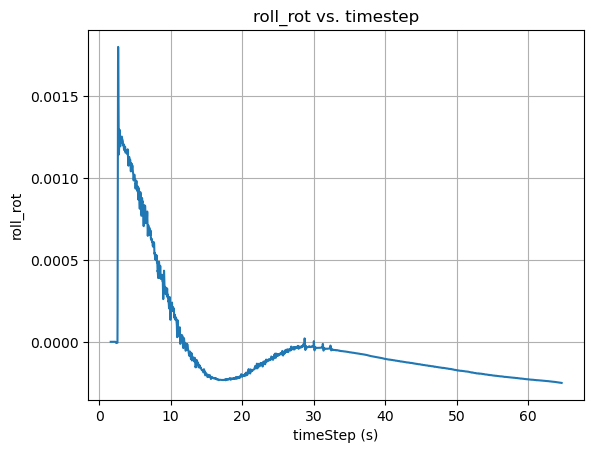

In [14]:
roll_rot = np.array(bot_stateDF["roll_rot"])#roll from IMU
plt.plot(timestep[100:], roll_rot[100:])
plt.title("roll_rot vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("roll_rot")
plt.grid()
plt.show()

In [15]:
# #plot roll-angle from integ. gyro:roll-vel vs. timestep
# roll_ang = np.array(bot_stateDF["roll_ang"])
# roll_rot = np.array(bot_stateDF["roll_rot"])#roll from IMU
# timestep = np.array(bot_stateDF["timestep"])
# print("length of roll ang: {}".format(len(roll_ang)))
# print("length of timestep: {}".format(len(timestep)))
# print(roll_ang[len(roll_ang) - 20:])
# print(np.mean(roll_ang[len(roll_ang) - 20:]))

# plt.plot(timestep[2805:2845], roll_ang[2805:2845])
# plt.title("roll_ang(att-est.d) vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("roll_ang(radians)")
# plt.grid()
# plt.show()

# #plt.plot(timestep[200:], roll_ang[200:])
# plt.plot(timestep[100:], roll_ang[100:])
# plt.title("roll_ang(att-est.d) vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("roll_ang(radians)")
# plt.grid()
# plt.show()

# plt.plot(timestep[100:], roll_rot[100:])
# plt.title("roll_rot(imu) vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("roll_rot")
# plt.grid()
# plt.show()

length of pitch vel: 4043
length of timestep: 4043
[5.53694482e-05 5.48915900e-05 5.49353345e-05 5.22410454e-05
 5.12926090e-05 5.37563689e-05 5.84156272e-05 6.30932311e-05
 5.12479334e-05 4.27289097e-05 4.11879580e-05 4.12760010e-05
 4.15618413e-05 3.86943598e-05 4.53945354e-05 5.38054086e-05
 3.76872430e-05 3.94724030e-05 4.18430223e-05 4.38775694e-05]
6.166758543978499e-05


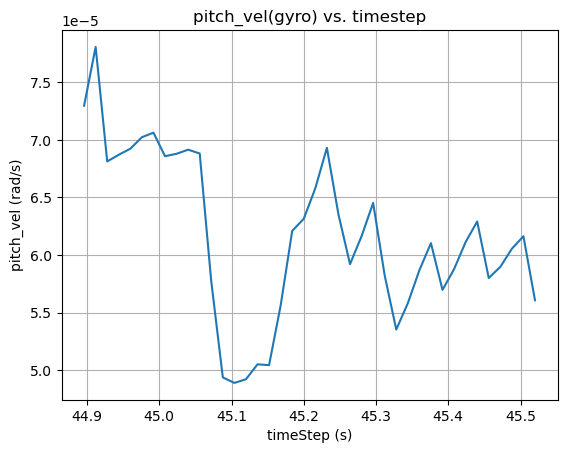

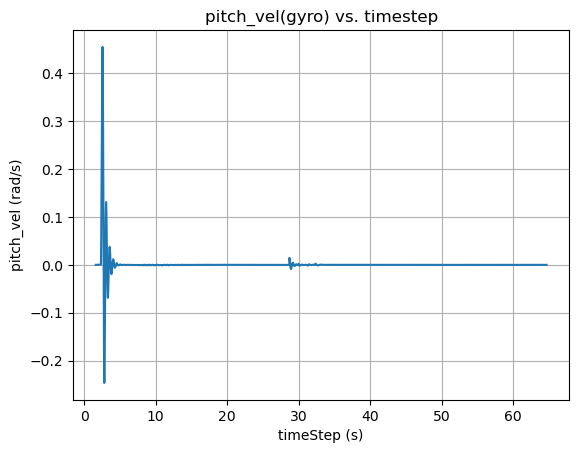

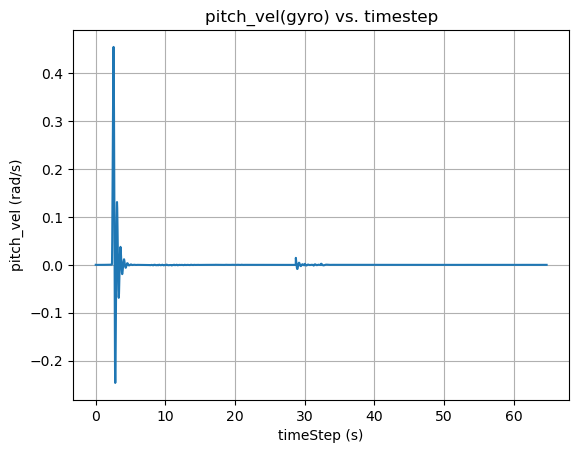

In [16]:
#plot pitch velocity from gyro vs. timestep
pitch_vel = np.array(bot_stateDF["pitch_vel"])
timestep = np.array(bot_stateDF["timestep"])
print("length of pitch vel: {}".format(len(pitch_vel)))
print("length of timestep: {}".format(len(timestep)))
print(pitch_vel[len(pitch_vel) - 20:])
print(np.mean(pitch_vel[2805:2845]))

plt.plot(timestep[2805:2845], pitch_vel[2805:2845])
plt.title("pitch_vel(gyro) vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("pitch_vel (rad/s)")
plt.grid()
plt.show()

#plt.plot(timestep[400:], pitch_vel[400:])
plt.plot(timestep[100:], pitch_vel[100:])
plt.title("pitch_vel(gyro) vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("pitch_vel (rad/s)")
plt.grid()
plt.show()

plt.plot(timestep, pitch_vel)
plt.title("pitch_vel(gyro) vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("pitch_vel (rad/s)")
plt.grid()
plt.show()

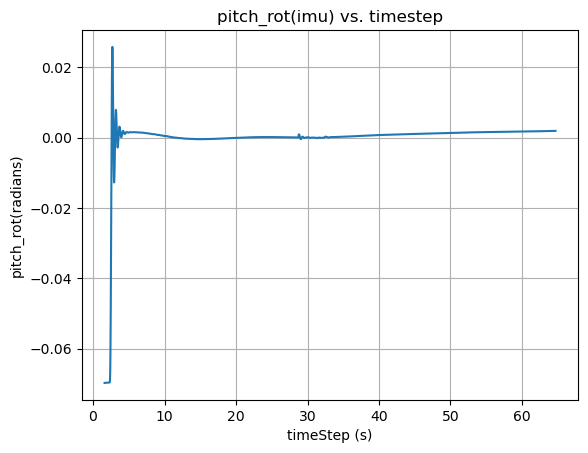

In [17]:
pitch_rot = np.array(bot_stateDF["pitch_rot"])
plt.plot(timestep[100:], pitch_rot[100:])
plt.title("pitch_rot(imu) vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("pitch_rot(radians)")
plt.grid()
plt.show()

In [18]:
# #plot local pitch-angle from integ. gyro: local pitch-vel vs. timestep
# pitch_ang = np.array(bot_stateDF["pitch_ang"])
# pitch_rot = np.array(bot_stateDF["pitch_rot"])
# timestep = np.array(bot_stateDF["timestep"])
# print("length of roll ang: {}".format(len(pitch_ang)))
# print("length of timestep: {}".format(len(timestep)))
# print(pitch_ang[len(pitch_ang) - 20:])
# print(np.mean(pitch_ang[len(pitch_ang) - 20:]))

# plt.plot(timestep[2805:2845], pitch_ang[2805:2845])
# plt.title("pitch_ang(ang-est.d) vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("pitch_ang(radians)")
# plt.grid()
# plt.show()

# plt.plot(timestep[100:], pitch_ang[100:])
# plt.title("pitch_ang(ang-est.d) vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("roll_ang(radians)")
# plt.grid()
# plt.show()

# plt.plot(timestep[100:], pitch_rot[100:])
# plt.title("pitch_rot(imu) vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("pitch_rot(radians)")
# plt.grid()
# plt.show()

length of pitch vel: 4043
length of timestep: 4043
[-0.00243322 -0.00243487 -0.00243567 -0.00243576 -0.00243592 -0.00243982
 -0.00244281 -0.00244532 -0.00243846 -0.00243383 -0.00243553 -0.0024364
 -0.00243692 -0.00243741 -0.00244314 -0.00244745 -0.00243561 -0.00243769
 -0.00243884 -0.00243962]
-0.002438214160599575
-0.004282094292251677


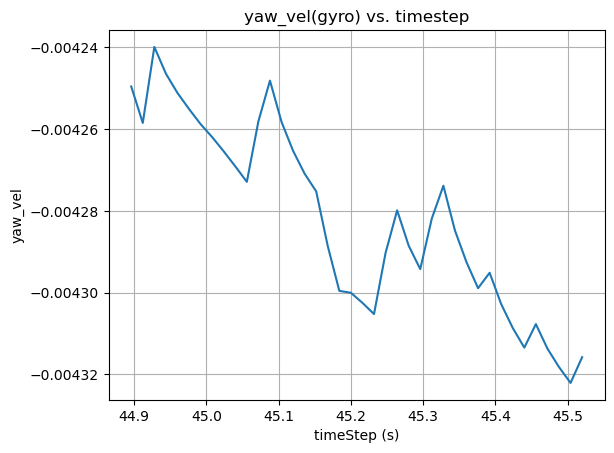

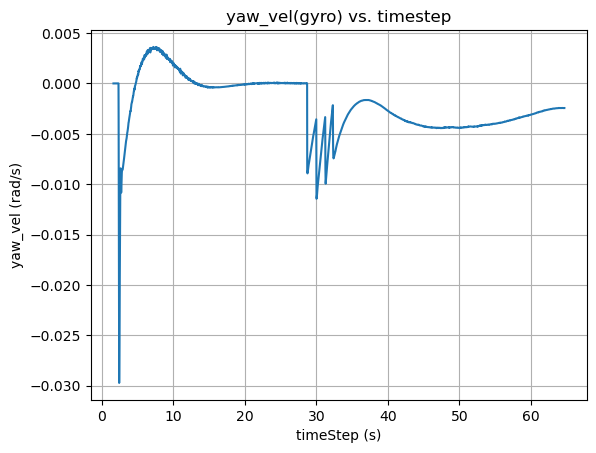

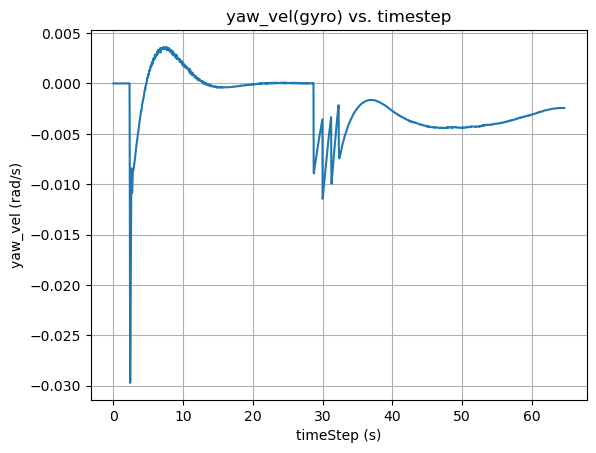

In [19]:
#plot yaw acceleration vs. timestep
yaw_vel = np.array(bot_stateDF["yaw_vel"])
timestep = np.array(bot_stateDF["timestep"])
print("length of pitch vel: {}".format(len(yaw_vel)))
print("length of timestep: {}".format(len(timestep)))
print(yaw_vel[len(yaw_vel) - 20:])
print(np.mean(yaw_vel[len(yaw_vel) - 20:]))
print(np.mean(yaw_vel[2805:2845]))

plt.plot(timestep[2805:2845], yaw_vel[2805:2845])
plt.title("yaw_vel(gyro) vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_vel")
plt.grid()
plt.show()

#plt.plot(timestep[400:], pitch_vel[400:])
plt.plot(timestep[100:], yaw_vel[100:])
plt.title("yaw_vel(gyro) vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_vel (rad/s)")
plt.grid()
plt.show()

plt.plot(timestep, yaw_vel)
plt.title("yaw_vel(gyro) vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_vel (rad/s)")
plt.grid()
plt.show()

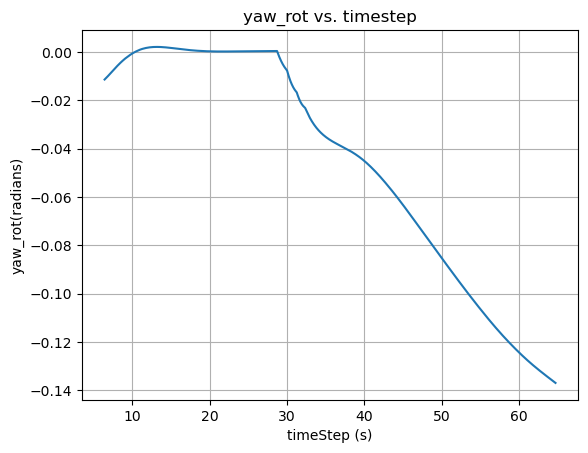

In [20]:
yaw_rot = np.array(bot_stateDF["yaw_rot"])

plt.plot(timestep[400:], yaw_rot[400:])
plt.title("yaw_rot vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_rot(radians)")
plt.grid()
plt.show()

In [21]:
# #plot local pitch-angle from integ. gyro: local pitch-vel vs. timestep
# yaw_ang = np.array(bot_stateDF["yaw_ang"])
# yaw_rot = np.array(bot_stateDF["yaw_rot"])
# timestep = np.array(bot_stateDF["timestep"])
# print("length of yaw ang: {}".format(len(yaw_ang)))
# print("length of timestep: {}".format(len(timestep)))
# print(yaw_ang[len(yaw_ang) - 20:])
# print(np.mean(yaw_ang[len(yaw_ang) - 20:]))

# plt.plot(timestep[2805:2845], yaw_ang[2805:2845])
# plt.title("yaw_ang(ang-est.d) vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("yaw_ang(radians)")
# plt.grid()
# plt.show()

# plt.plot(timestep[400:], yaw_ang[400:])
# plt.title("yaw_ang(ang-est'd) vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("yaw_ang(radians)")
# plt.grid()
# plt.show()

# plt.plot(timestep[400:], yaw_rot[400:])
# plt.title("yaw_rot(imu) vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("yaw_rot(radians)")
# plt.grid()
# plt.show()

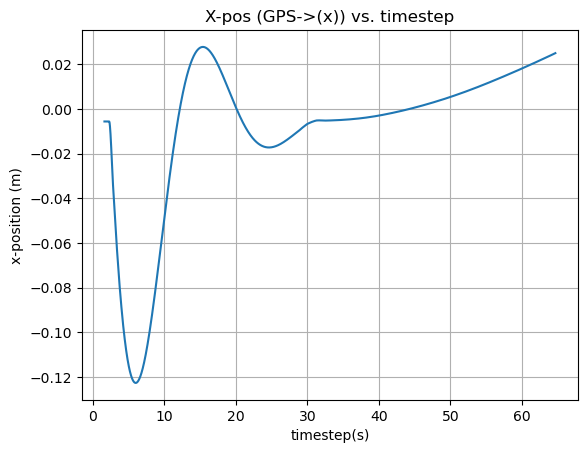

0.0249936541613727


In [22]:
x_pos = np.array(bot_stateDF["x_pos"])
timestep = np.array(bot_stateDF["timestep"])


plt.plot(timestep[100:], x_pos[100:])
plt.title("X-pos (GPS->(x)) vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("x-position (m)")
plt.grid()
plt.show()
print(x_pos[len(x_pos)-1])

In [23]:
# ###Plot y-dot global from matmul(local2global rot-matrix, integ. y-acc)vs timestep
# y_pos = np.array(bot_stateDF["y_pos"])
# y_pos_global = np.array(bot_stateDF["ypos_local"])
# timestep = np.array(bot_stateDF["timestep"])
# print("length of timestep: {}".format(len(timestep)))


# plt.plot(timestep[400:], y_pos_global[400:])
# plt.title("y_pos_global(derivd) vs. timestep")
# plt.xlabel("timestep(s)")
# plt.ylabel("y-pos-global(m)")
# plt.grid()
# plt.show()

# plt.plot(timestep[400:], y_pos[400:])
# plt.title("y_pos(GPS) vs. timestep")
# plt.xlabel("timestep(s)")
# plt.ylabel("y-pos(m)")
# plt.grid()
# plt.show()

length of zpos: 4043
length of timestep: 4043
zpos-min: 0.1156619968273929
[1.20222184 1.20225874 1.20229566 1.20233259 1.20236953]


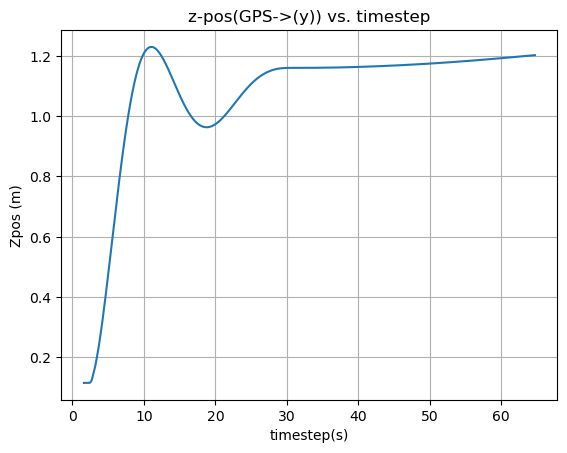

In [24]:
###Plot alt-acc vs timestep
zpos = np.array(bot_stateDF["z_pos"])
timestep = np.array(bot_stateDF["timestep"])
print("length of zpos: {}".format(len(zpos)))
print("length of timestep: {}".format(len(timestep)))
print("zpos-min: {}".format(zpos.min()))
print(zpos[len(zpos) - 5:])


plt.plot(timestep[100:], zpos[100:])
plt.title("z-pos(GPS->(y)) vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Zpos (m)")
plt.grid()
plt.show()

length of xposPD: 4043
length of timestep: 4043
[0.00821424 0.00821424 0.00817296 0.00817296 0.00825734 0.00826214
 0.00826214 0.00826214 0.00839178 0.00839178 0.00831976 0.00832456
 0.00824859 0.00834675 0.00834675 0.00834675 0.00834675 0.00845898
 0.00839885 0.00840951 0.00840951 0.0084366  0.00844147 0.00836511
 0.00836511 0.00836511 0.00858388 0.00840763 0.00840763 0.00869859
 0.00852696 0.00852696 0.00855422 0.00855422 0.00851243 0.00851243
 0.00851243 0.00870232 0.00870232 0.00862936 0.00862936 0.00862936
 0.00865956 0.00857866 0.00857866 0.00887171 0.00869882 0.00869882
 0.00869882 0.00883094]


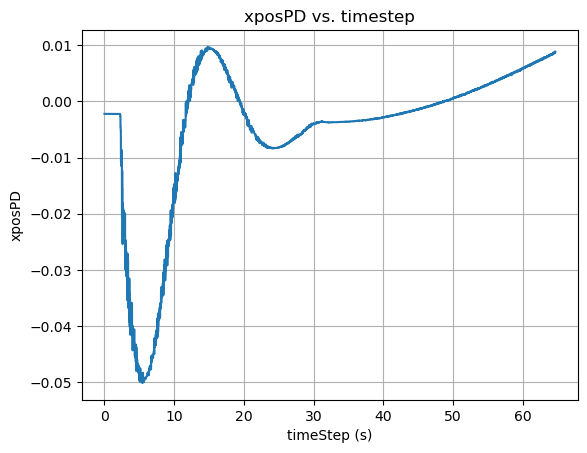

In [25]:
###Plot xposPID vs. timestep
xposPD = np.array(PIDinputsDF["xposPD"])
timestep = np.array(bot_stateDF["timestep"])
print("length of xposPD: {}".format(len(xposPD)))
print("length of timestep: {}".format(len(timestep)))
print(xposPD[len(xposPD) - 50:])

plt.plot(timestep, xposPD)
plt.title("xposPD vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("xposPD")
plt.grid()
plt.show()

length of yposPD: 4043
length of timestep: 4043


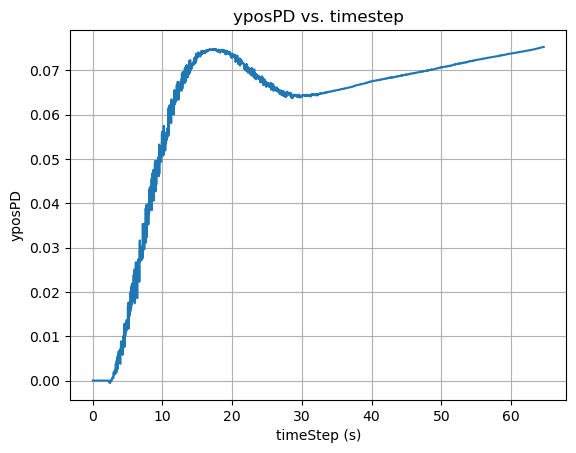

In [26]:
###Plot rollPID vs. timestep
yposPD = np.array(PIDinputsDF["yposPD"])
timestep = np.array(bot_stateDF["timestep"])
print("length of yposPD: {}".format(len(yposPD)))
print("length of timestep: {}".format(len(timestep)))

plt.plot(timestep, yposPD)
plt.title("yposPD vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yposPD")
plt.grid()
plt.show()

length of throttlePID: 4043
length of timestep: 4043


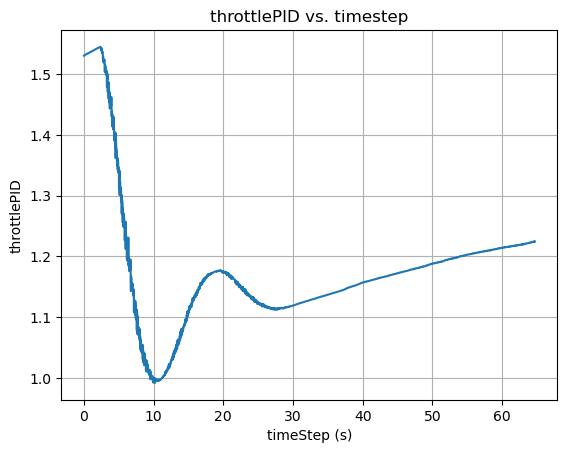

In [27]:
#plot throttlePID over time
throttlePID = np.array(PIDinputsDF["throttlePID"])
timestep = np.array(bot_stateDF["timestep"])
print("length of throttlePID: {}".format(len(throttlePID)))
print("length of timestep: {}".format(len(timestep)))

plt.plot(timestep, throttlePID)
plt.title("throttlePID vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("throttlePID")
plt.grid()
plt.show()

length of rollPID: 4043
length of timestep: 4043
[4.52630856e-05 4.52630856e-05 4.44370900e-05 4.44370900e-05
 4.42280754e-05 4.48680636e-05 4.48680636e-05 4.48680636e-05
 4.57775544e-05 4.57775544e-05 4.56122453e-05 4.52237461e-05
 4.48365919e-05 4.47577169e-05 4.47577169e-05 4.47577169e-05
 4.47577169e-05 4.52046374e-05 4.54767965e-05 4.55603428e-05
 4.55603428e-05 4.55329985e-05 4.54791366e-05 4.52373804e-05
 4.52373804e-05 4.52373804e-05 4.52798673e-05 4.54400547e-05
 4.54400547e-05 4.63861407e-05 4.65117449e-05 4.65117449e-05
 4.59936242e-05 4.59936242e-05 4.54086111e-05 4.54086111e-05
 4.54086111e-05 4.55065915e-05 4.55065915e-05 4.63726312e-05
 4.63726312e-05 4.63726312e-05 4.60315392e-05 4.56342576e-05
 4.56342576e-05 4.60145728e-05 4.67536501e-05 4.67536501e-05
 4.67536501e-05 4.65622211e-05]


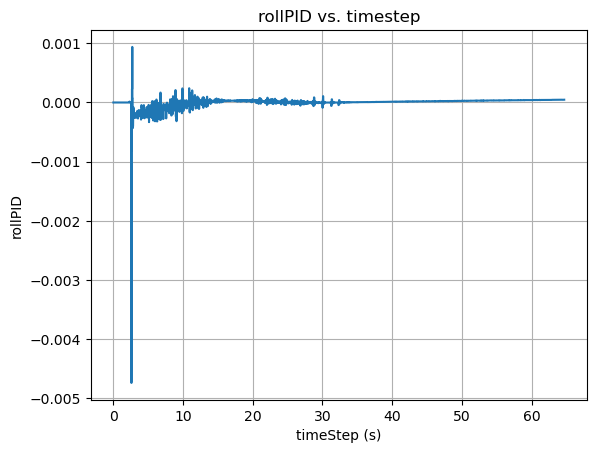

In [28]:
###Plot rollPID vs. timestep
rollPID = np.array(PIDinputsDF["rollPID"])
timestep = np.array(bot_stateDF["timestep"])
print("length of rollPID: {}".format(len(rollPID)))
print("length of timestep: {}".format(len(timestep)))
print(rollPID[len(rollPID) - 50:])

plt.plot(timestep, rollPID)
plt.title("rollPID vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("rollPID")
plt.grid()
plt.show()

length of pitchPID: 4043
length of timestep: 4043
[-0.00211369 -0.00211369 -0.00211312 -0.00211312 -0.00211757 -0.00211874
 -0.00211874 -0.00211874 -0.00212575 -0.00212575 -0.00212204 -0.00212223
 -0.00212003 -0.0021253  -0.0021253  -0.0021253  -0.0021253  -0.00213239
 -0.00212896 -0.00212961 -0.00212961 -0.00213135 -0.00213162 -0.0021286
 -0.0021286  -0.0021286  -0.00214051 -0.00213177 -0.00213177 -0.00214804
 -0.00213715 -0.00213715 -0.00213867 -0.00213867 -0.00213724 -0.00213724
 -0.00213724 -0.00214673 -0.00214673 -0.00214215 -0.00214215 -0.00214215
 -0.00214297 -0.00214067 -0.00214067 -0.00215261 -0.00214468 -0.00214468
 -0.00214468 -0.00214984]


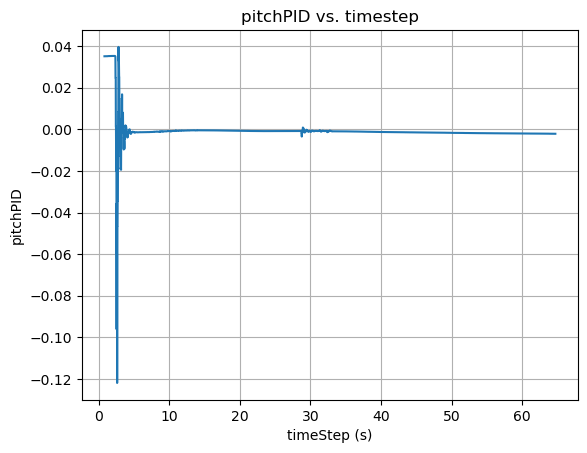

In [29]:
###Plot pitchPID vs. timestep
pitchPID = np.array(PIDinputsDF["pitchPID"])
timestep = np.array(bot_stateDF["timestep"])
print("length of pitchPID: {}".format(len(rollPID)))
print("length of timestep: {}".format(len(timestep)))
print(pitchPID[len(pitchPID) - 50:])

plt.plot(timestep[50:], pitchPID[50:])
plt.title("pitchPID vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("pitchPID")
plt.grid()
plt.show()

length of yawPID: 4043
length of timestep: 4043


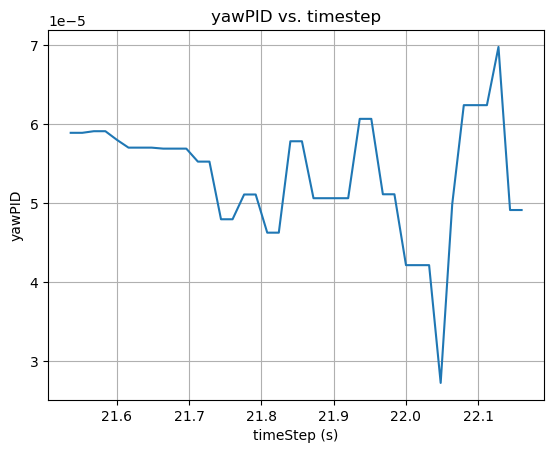

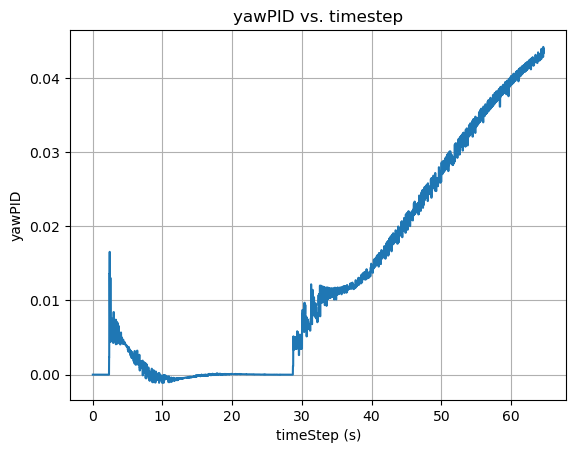

In [30]:
###Plot pitchPID vs. timestep
yawPID = np.array(PIDinputsDF["yawPID"])
timestep = np.array(bot_stateDF["timestep"])
print("length of yawPID: {}".format(len(yawPID)))
print("length of timestep: {}".format(len(timestep)))

plt.plot(timestep[1345:1385], yawPID[1345:1385])
plt.title("yawPID vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yawPID")
plt.grid()
plt.show()

plt.plot(timestep, yawPID)
plt.title("yawPID vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yawPID")
plt.grid()
plt.show()

length of tgt_waypt_err: 4043
length of timestep: 4043
[0.1676217  0.16762379 0.16762589 0.167628   0.16763012 0.16763225
 0.16763438 0.16763651 0.16763865 0.16764079 0.16764293 0.16764509
 0.16764725 0.16764943 0.16765161 0.1676538  0.167656   0.1676582
 0.1676604  0.16766261 0.16766483 0.16766706 0.16766929 0.16767153
 0.16767378 0.16767604 0.16767832 0.16768058 0.16768286 0.16768515
 0.16768742 0.16768971 0.16769201 0.16769431 0.16769663 0.16769895
 0.16770128 0.16770363 0.16770596 0.16770829 0.16771064 0.16771299
 0.16771536 0.16771773 0.16772011 0.1677225  0.16772488 0.16772726
 0.16772966 0.16773207]


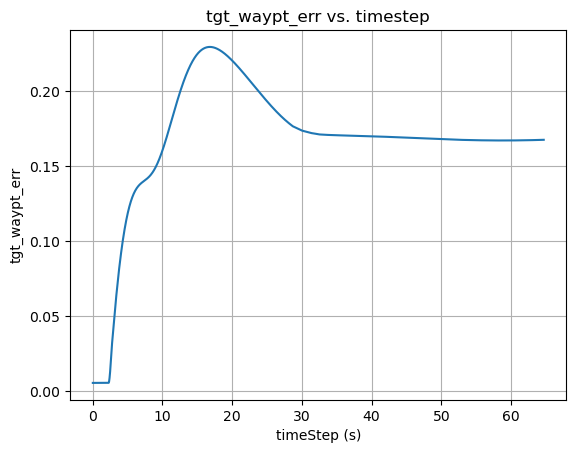

In [31]:
#plot error between bot and tgt-waypt
tgt_waypt_err = np.array(bot_stateDF["tgt_waypt_err"])
timestep = np.array(bot_stateDF["timestep"])
print("length of tgt_waypt_err: {}".format(len(tgt_waypt_err)))
print("length of timestep: {}".format(len(timestep)))
print(tgt_waypt_err[len(tgt_waypt_err) - 50:])

plt.plot(timestep, tgt_waypt_err)
plt.title("tgt_waypt_err vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("tgt_waypt_err")
plt.grid()
plt.show()

In [32]:
#return array of pitch waypts
def generatePitchWaypts(calcd_dist, calcd_timestep):
    #calculate number of waypoints
    #num_of_waypts = np.round(calcd_dist) / (self.pitch_velocity * calcd_timestep)
    num_of_waypts  = len(x_pos)
    print("num of waypts: {}".format(num_of_waypts))
    # Calculate the vector from origin to target
    x_wypt = 7.6
    y_wypt = 2.5
    delta_x = x_wypt - x_pos[0]
    delta_y = y_wypt - y_pos[0]
    # Calculate the step size for each waypoint
    if num_of_waypts > 1:
        step_x = delta_x / (num_of_waypts - 1) 
        step_y = delta_y / (num_of_waypts - 1)
    else:
        step_x = 0
        step_y = 0
    # Generate the list of waypoints
    waypoints = []
    for i in range(int(num_of_waypts)):
        x = x_pos[0] + i * step_x
        y = y_pos[1] + i * step_y
        waypoints.append((x, y))
    return waypoints

In [33]:
#display error between flight trajectory and 
#get true-trajectory distance from center
def getFlightMSE(x_true, y_true, x_traj, y_traj):
    true_dist = np.sqrt(np.square(x_true) + np.square(y_true))
    true_dist_avg = np.round(np.mean(true_dist), 4)
    print(true_dist_avg)
    true_dist = np.full(len(x_traj), true_dist_avg)
    print(true_dist)
    print(len(true_dist))
    #get flight-trajectory distance from cetner
    flgt_dist = np.sqrt(np.square(x_traj) + np.square(y_traj))
    print(flgt_dist)
    print(len(flgt_dist))
    #collect mse(true vs. flight)
    flgt_MSE = mean_squared_error(true_dist, flgt_dist)
    print("MSE: {:.4f}".format(flgt_MSE))
    return flgt_MSE

In [34]:
#plot travelled trajectory on top of true-trajectory
def getTrueTraj():
    waypoint_traj = os.getcwd() + '\\waypoint_logfile.txt'
    #waypoint_traj = os.getcwd() + '\\waypoint_logfile_infinity.txt'
    cols = ['xpos', 'ypos', 'zpos']
    trueTrajDF = pd.read_csv(waypoint_traj, sep=" ", names=cols)
    x_list = np.array(trueTrajDF['xpos'])
    y_list = np.array(trueTrajDF['ypos'])
    z_list = np.array(trueTrajDF['zpos'])
    return x_list, y_list, z_list

num of waypts: 4043
len of xref: 4043
len of yref: 4043
7.2464
[7.2464 7.2464 7.2464 ... 7.2464 7.2464 7.2464]
4043
[0.00562459 0.00562463 0.00562466 ... 0.16772642 0.16772882 0.16773123]
4043
MSE: 50.1123


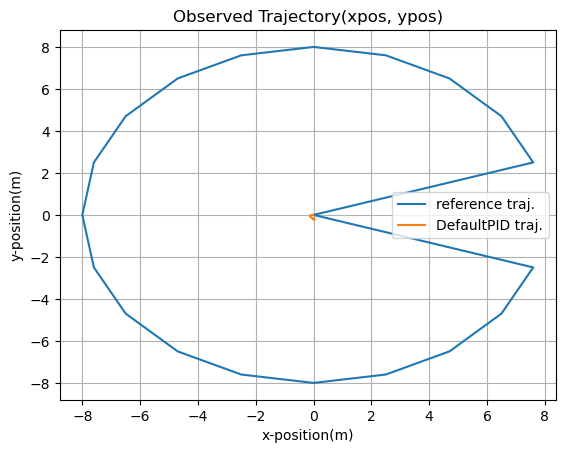

In [35]:
#plot trajectory reference path
x_wypt = 7.6
y_wypt = 2.5
calcd_dist = np.sqrt(((y_wypt - y_pos[0]) ** 2) + ((x_wypt - x_pos[0]) ** 2))
step = timestep[1] - timestep[0]
reference_path = generatePitchWaypts(calcd_dist, step)
x_ref = []
y_ref = []
for i, ref_pt in enumerate(reference_path):
    x_ref.append(ref_pt[0])
    y_ref.append(ref_pt[1])

print("len of xref: {}".format(len(x_ref)))
print("len of yref: {}".format(len(y_ref)))



x_true, y_true, z_true = getTrueTraj()
plt.plot(x_true, y_true)
plt.xlabel("x-val trajectory (m)")
plt.ylabel("y-val trajectory (m)")
plt.title("Pac-Man Plot")

trajMSE = getFlightMSE(x_true, y_true, x_pos, y_pos)
    
#plot trajectory for pitch chg. (xpos, ypos)
plt.plot(x_pos, y_pos)
#plt.plot(x_ref, y_ref)
plt.title("Observed Trajectory(xpos, ypos)")
plt.legend(['reference traj.', 'DefaultPID traj.'])
plt.xlabel("x-position(m)")
plt.ylabel("y-position(m)")
plt.grid()
plt.show()

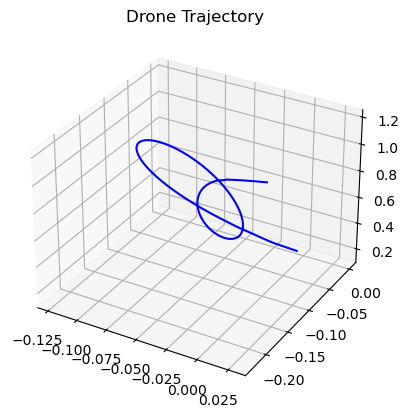

In [36]:
#plot trajectory for pitch chg. in 3D (xpos, ypos, zpos)
ax = plt.figure().add_subplot(projection='3d')
xline = x_pos
yline = y_pos
zline = zpos

ax.plot3D(xline, yline, zline, 'blue')
ax.set_title('Drone Trajectory')
plt.show()

length of y_acc: 4043
length of timestep: 4043
y_acc-min: -0.0784655893338217
y_acc-max: 0.0232767466917517
[2.26938255e-05 2.61668521e-05 1.71994007e-05 1.91368469e-05
 2.04791118e-05 2.13687727e-05 2.19524964e-05 2.23354238e-05
 2.25900059e-05 2.27648049e-05 2.28917541e-05 2.29913820e-05
 2.30766933e-05 2.31556636e-05 2.32330633e-05 2.33116081e-05
 2.33926828e-05 2.34769236e-05 2.35644446e-05 2.36551427e-05
 2.37487261e-05 2.38448942e-05 2.39432833e-05 2.40435932e-05
 2.41455117e-05 2.42487742e-05 2.43531729e-05 2.44584826e-05
 2.45645710e-05 2.46712680e-05 2.47784913e-05 2.48861141e-05
 2.49940908e-05 2.51023253e-05 2.52107965e-05 2.53194397e-05
 2.54282246e-05 2.55371380e-05 2.56461328e-05 2.57552172e-05
 2.58643498e-05 2.59735452e-05 2.60827673e-05 2.61920348e-05
 2.63013148e-05 2.64106290e-05 2.65199466e-05 2.66292893e-05
 2.67386380e-05 2.68479891e-05]
[-0.00084164 -0.00084008 -0.00080239 -0.00086513 -0.00085216 -0.00076684
 -0.00081243 -0.00089098 -0.00087304 -0.00083447 -0.000

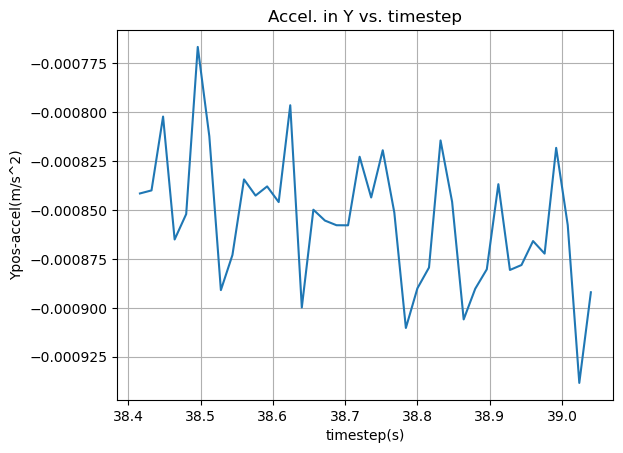

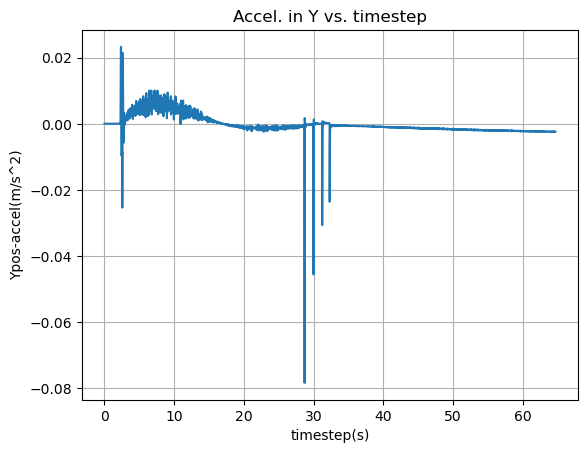

In [37]:
###Plot y-acc vs timestep
y_acc = np.array(bot_stateDF["y_acc"])
timestep = np.array(bot_stateDF["timestep"])
print("length of y_acc: {}".format(len(y_acc)))
print("length of timestep: {}".format(len(timestep)))
print("y_acc-min: {}".format(y_acc.min()))

print("y_acc-max: {}".format(y_acc.max()))
print(y_acc[:50])
print(y_acc[2400:2440])
print(timestep[2400:2440])
print("y_acc at index: {}".format(y_acc[120]))
print(y_acc[len(y_acc) - 5:])


plt.plot(timestep[2400:2440], y_acc[2400:2440])
plt.title("Accel. in Y vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Ypos-accel(m/s^2)")
plt.grid()
plt.show()

plt.plot(timestep, y_acc)
plt.title("Accel. in Y vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Ypos-accel(m/s^2)")
plt.grid()
plt.show()

length of alt_acc: 4043
length of timestep: 4043
alt_acc-min: 9.69209368417578
[9.81006892 9.81006256 9.81007151 9.810074   9.81007641 9.81005882
 9.81004907 9.8100982  9.81006822 9.81005327 9.81004452 9.81005914
 9.81003042 9.81006756 9.81006897 9.81005086 9.81007791 9.81010004
 9.81007664 9.81009534 9.81008848 9.81006785 9.81006163 9.81004008
 9.8100792  9.81006221 9.81005783 9.81003624 9.81007507 9.8100581
 9.81004889 9.81007186 9.81007354 9.81005663 9.81004762 9.81007014
 9.81007192 9.81005484 9.81004563 9.81006799]


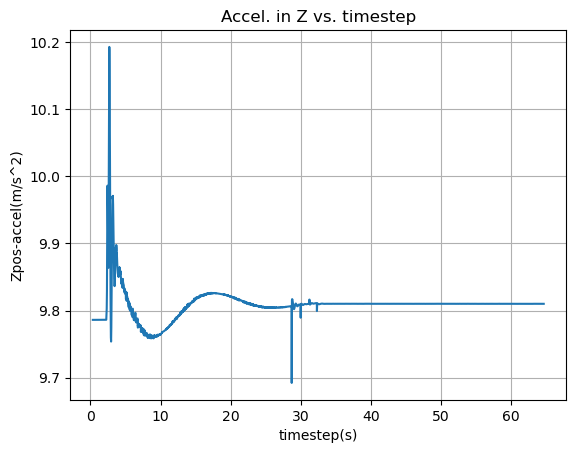

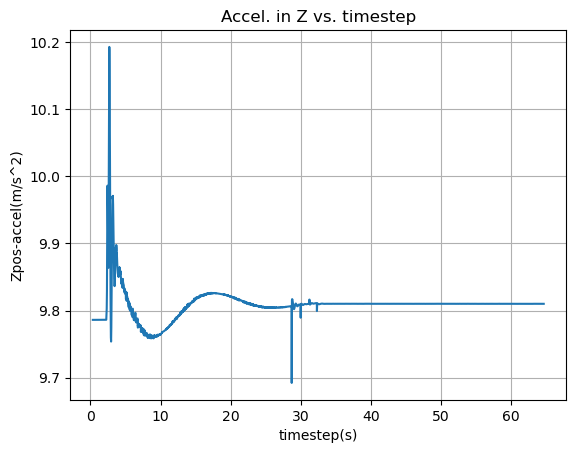

In [38]:
###Plot alt-acc vs timestep
alt_acc = np.array(bot_stateDF["alt_acc"])
timestep = np.array(bot_stateDF["timestep"])
print("length of alt_acc: {}".format(len(alt_acc)))
print("length of timestep: {}".format(len(timestep)))
print("alt_acc-min: {}".format(alt_acc.min()))
print(alt_acc[2805:2845])

plt.plot(timestep[20:], alt_acc[20:])
#plt.plot(timestep[100:], alt_acc[100:])
plt.title("Accel. in Z vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Zpos-accel(m/s^2)")
plt.grid()
plt.show()

plt.plot(timestep[20:], alt_acc[20:])
#plt.plot(timestep[100:], alt_acc[100:])
plt.title("Accel. in Z vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Zpos-accel(m/s^2)")
plt.grid()
plt.show()

length of z-pos: 4043
length of timestep: 4043
z-pos max: 1.2295147037303404
zpos-error: 1.7704852962696596
[1.20222184 1.20225874 1.20229566 1.20233259 1.20236953]
No. of peaks found: 0
final peak val: 0
peak_sum: 0
peak_cnt: 0
peak_avg: 500
overshoot: 497.0
adjust-time: 9999
fitness: 6.3168


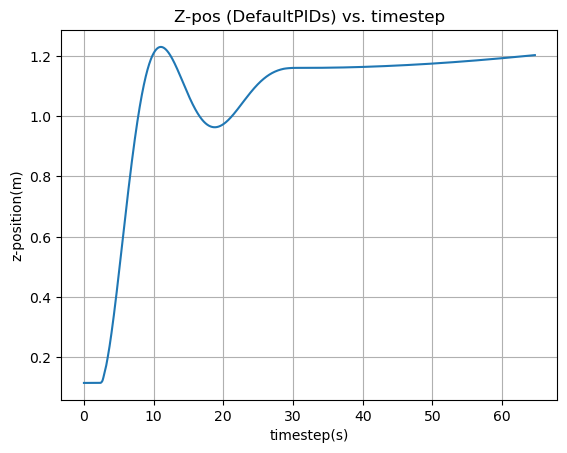

In [39]:
###Plot z-pos vs timestep
z_pos = np.array(bot_stateDF["z_pos"])
timestep = np.array(bot_stateDF["timestep"])
print("length of z-pos: {}".format(len(z_pos)))
print("length of timestep: {}".format(len(timestep)))
zpos_max = z_pos.max()
print("z-pos max: {}".format(zpos_max))
zpos_exp = float(3)
zpos_err = abs(zpos_max - zpos_exp)
print("zpos-error: {}".format(zpos_err))
print(z_pos[len(z_pos) - 5:])

##collect peaks from zpos
exp_error = 0.5
peaks, peak_props = find_peaks(z_pos, height=zpos_exp, distance=10)
print("No. of peaks found: {}".format(len(peaks)))

peak_bal_val = 0
peak_cnt = 0
peak_sum = 0
while peak_bal_val == 0 and peak_cnt < len(peaks):
    peak = peaks[peak_cnt]
    peak_val = z_pos[peak]
    peak_sum += peak_val
    print("peak-{}: {}".format(peak_cnt, peak_val))
    peak_err = peak_val - zpos_exp
    print("peak-error: {}".format(peak_err))
    if peak_err < exp_error:
        peak_sum += peak_val
        peak_bal_val = peak_val
    peak_cnt+=1
print("final peak val: {}".format(peak_bal_val))
time_indices = []
#find time at peak
for i, val in enumerate(z_pos):
    if val == peak_bal_val:
        time_indices.append(i)
        

#set condition for when peak-cnt = 0
if peak_cnt == 0:
    peak_avg = 500
else:
    peak_avg = peak_sum / peak_cnt
    
print("peak_sum: {}".format(peak_sum))
print("peak_cnt: {}".format(peak_cnt))
print("peak_avg: {}".format(peak_avg))
overshoot = abs(peak_avg - zpos_exp)
print("overshoot: {}".format(overshoot))

ovshot_exp = 0.2
adjst_time_exp = float(12)
if len(time_indices) > 0 and peak_bal_val != 0:
    adjst_time = timestep[0] * time_indices[0]
else:
    adjst_time = 9999
    
print("adjust-time: {}".format(adjst_time))
fitness = np.log10((adjst_time/adjst_time_exp) + 1) + np.log10((overshoot/ovshot_exp) + 1)
print("fitness: {:.4f}".format(fitness))



plt.plot(timestep, z_pos)
plt.title("Z-pos (DefaultPIDs) vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("z-position(m)")
plt.grid()
plt.show()

In [40]:
#get gyro arrays (local rotational velocity)
rollvel_arr = roll_vel[2805:2845]
pitchvel_arr = pitch_vel[2805:2845]
yawvel_arr = yaw_vel[2805:2845]

#get accelerometer arrays (local translational acceleration)
x_acc = np.array(bot_stateDF["x_acc"])
y_acc = np.array(bot_stateDF["y_acc"])
alt_acc = np.array(bot_stateDF["alt_acc"])
xacc_arr = x_acc[2805:2845]
yacc_arr = y_acc[2805:2845]
altacc_arr = alt_acc[2805:2845]

#get input arrays
gyro_meas = np.array([rollvel_arr, pitchvel_arr, yawvel_arr])
accel_meas = np.array([xacc_arr, yacc_arr, altacc_arr])

print("roll-rot(imu): {:.4f}".format(roll_rot[2805]))
print("pitch-rot(imu): {:.4f}".format(pitch_rot[2805]))
print("yaw-rot(imu): {:.4f}".format(yaw_rot[2805]))

curr_roll = roll_rot[2805]
#curr_roll = roll_ang[2805]
curr_pitch = pitch_rot[2805]
#curr_pitch = pitch_ang[2805]
curr_yaw = yaw_rot[2805]
#curr_yaw = yaw_ang[2805]

loc2glo_rotmat_ypr = DCM(rpy=[curr_yaw, curr_pitch, curr_roll])
loc2glo_rotmat_rpy = DCM(rpy=[curr_roll, curr_pitch, curr_yaw])
print("YPR-RotMatrix:\n{}".format(loc2glo_rotmat_ypr))
print("RPY-RotMatrix:\n{}".format(loc2glo_rotmat_rpy))

trav_rpy = np.matmul(loc2glo_rotmat_rpy, np.array([x_pos[2805],
                                                   y_pos[2805],
                                                   zpos[2805]]))

trav_ypr = np.matmul(loc2glo_rotmat_ypr, np.array([x_pos[2805],
                                                   y_pos[2805],
                                                   zpos[2805]]))


print("trav_rpy:\n{}".format(trav_rpy))
print("trav_ypr:\n{}".format(trav_ypr))

tgt_waypt = np.array([7.6, 2.5, 3.0])
tgt_waypt_rotated = np.matmul(loc2glo_rotmat_ypr, tgt_waypt)
print("tgt-wypt:\n{}".format(tgt_waypt_rotated))

roll-rot(imu): -0.0001
pitch-rot(imu): 0.0010
yaw-rot(imu): -0.0629
YPR-RotMatrix:
[[ 9.99999397e-01  1.09777822e-03  1.78673130e-05]
 [-1.09777826e-03  9.99999397e-01  2.32180138e-06]
 [-1.78647534e-05 -2.34141433e-06  1.00000000e+00]]
RPY-RotMatrix:
[[ 1.00000000e+00  2.32180138e-06  1.78673130e-05]
 [-2.34141433e-06  9.99999397e-01  1.09777822e-03]
 [-1.78647534e-05 -1.09777826e-03  9.99999397e-01]]
trav_rpy:
[ 5.15781303e-04 -1.67870008e-01  1.16792884e+00]
trav_ypr:
[ 3.30482326e-04 -1.69149763e-01  1.16774425e+00]
tgt-wypt:
[7.60279347 2.49166234 2.99985837]
